Here you'll learn how to implement an Artificial Neural Network with Python and Numpy, without using any Neural Network Library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

The Perceptron

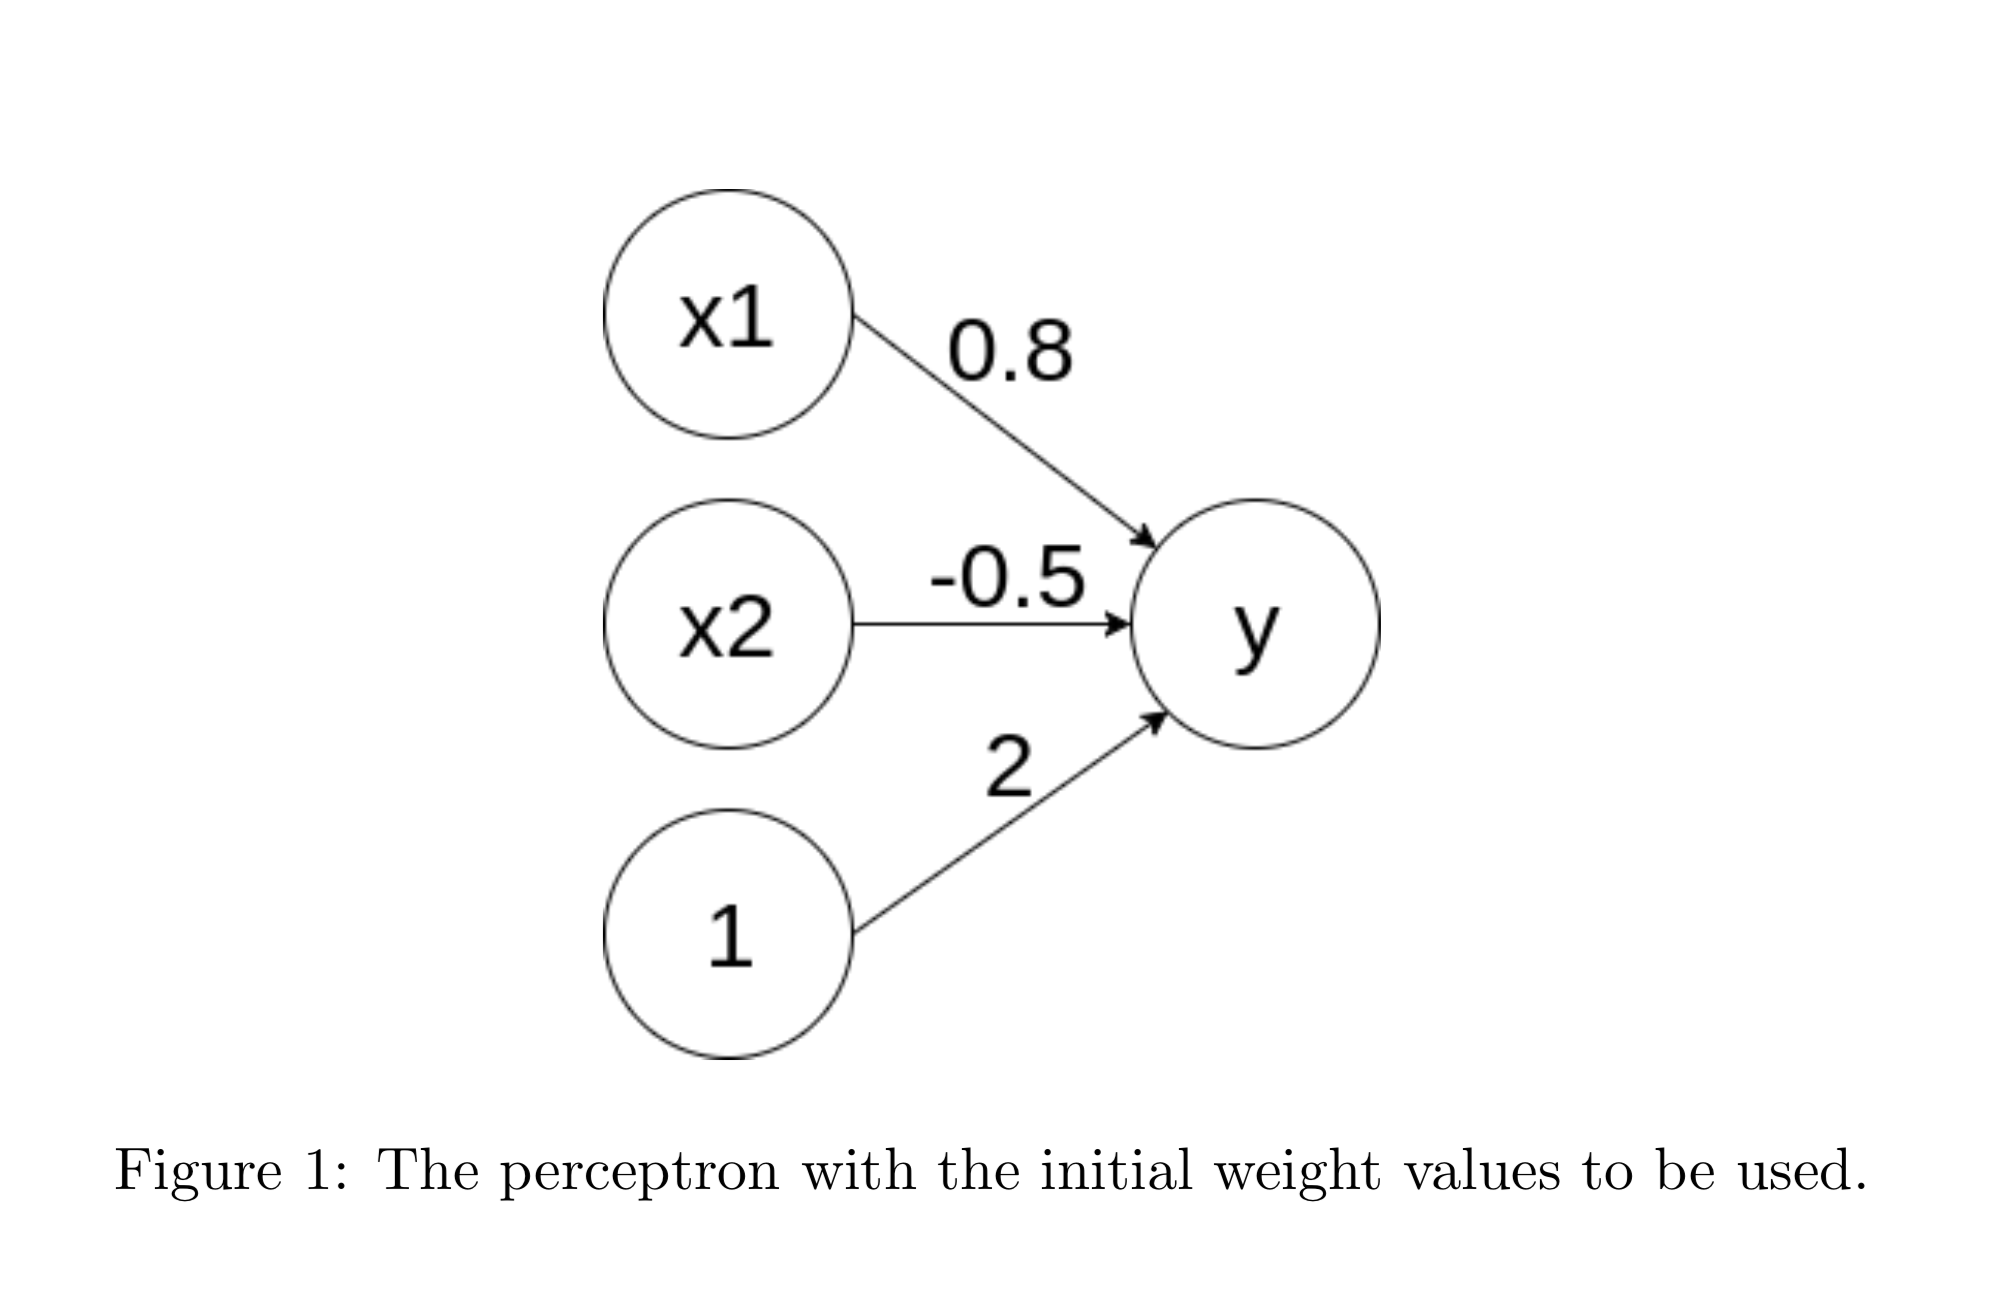

In [2]:
Image('Perceptron.png')

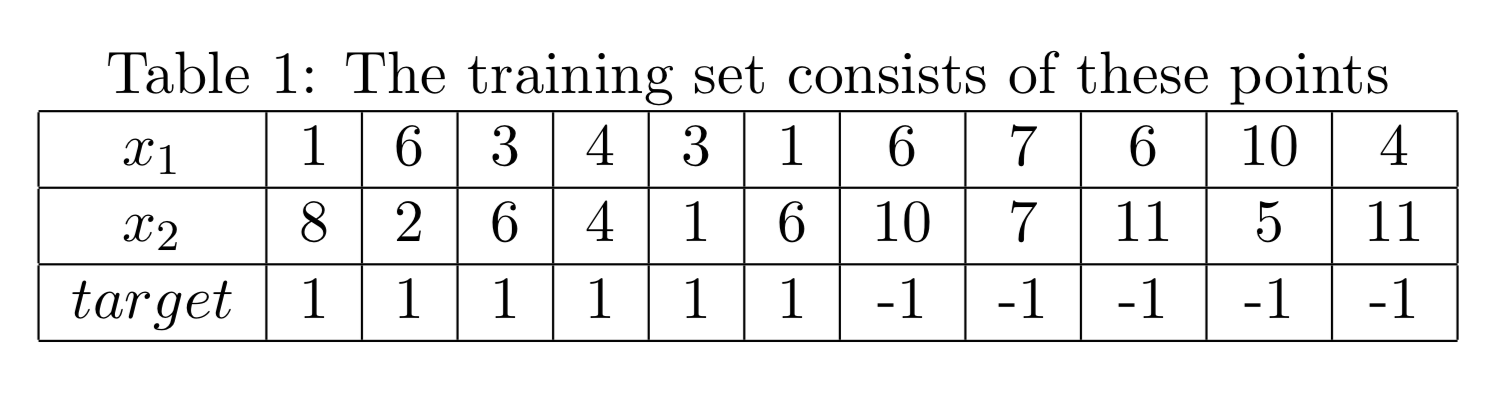

In [3]:
Image('Inputs.png')

In [4]:
def get_part1_data():
    """
    Returns the toy data for the first part.
    """
    X = np.array([[1, 8],[6,2],[3,6],[4,4],[3,1],[1, 6],[6,10],[7,7],[6,11],[10,5],[4,11]])
    T = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]).reshape(-1, 1)
    return X, T

In [5]:
def MSE(prediction, target):
    """
    Computes the Mean Squared Error of a prediction and its target
    """
    y = prediction
    t = target
    n = prediction.size

    ## Implement
    meanCost = 0
    for y,t in zip(y,t):
        meanCost += (((t-y)**2)/(2*n))
    ## End
    return meanCost

In [6]:
def dMSE(prediction, target):
    """
    Computes the derivative of the Mean Squared Error function.
    """
    y = prediction
    t = target
    n = prediction.size
    
    ## Implement

    error = (y-t)/n
    
    '''
    print("y : ", y) #for computing first Gradient Descent
    print("t : ", t) #for computing first Gradient Descent
    print("n : ", n) #for computing first Gradient Descent
    print("error : ", error) #for computing first Gradient Descent
    '''
    ## End
    return error

In [7]:
class Perceptron:
    """
    Keeps track of the variables of the Perceptron model. Can be used for prediction and to compute the gradients.
    """
    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
        self.var = {
            "W": np.array([[.8], [-.5]]),
            "b": 2
        }

    def forward(self, inputs):
        """
        Implements the forward pass of the perceptron model and returns the prediction y. We need to 
        store the current input for the backward function.
        """
        x = self.x = inputs
        W = self.var['W']
        b = self.var['b']
        ## Implement
        
        y = np.dot(x,W) + b
        #print("y : ", y) #for computing first Gradient Descent
        
        ## End
        return y

    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be 
        run before hand for self.x to be defined. Returns the derivatives without applying them using
        a dictonary similar to self.var.
        """
        
        x = self.x
        ## Implement

        dW = np.dot(x.T,error)
        #print("dW : ", dW) #for computing first Gradient Descent
        #print("Shape of dW : ", dW.shape) #for computing first Gradient Descent
        db = np.sum(error)

        ## End
        updates = {"W": dW,
                   "b": db}
        return updates

In [8]:
def train_one_step(model, learning_rate, inputs, targets):
    """
    Uses the forward and backward function of a model to compute the error and updates the model 
    weights while overwritting model.var. Returns the cost.
    """
    
    ## Implement
    prediction=model.forward(inputs)
    error=dMSE(prediction, targets)
    updates=model.backward(error)
    
    for varstr, grad in updates.items():
        model.var[varstr] = (model.var[varstr]-(learning_rate*grad))

    cost=MSE(prediction,targets)
    ## End
    return cost

In [9]:
def plot_data(X,T):
    """
    Plots the 2D data as a scatterplot
    """
    plt.scatter(X[:,0], X[:,1], s=40, c=T.flatten(), cmap=plt.cm.Spectral)

In [10]:
def plot_boundary(model, X, targets, threshold=0.0):
    """
    Plots the data and the boundary lane which seperates the input space into two classes.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y = model.forward(X_grid)
    plt.contourf(xx, yy, y.reshape(*xx.shape) < threshold, alpha=0.5)
    plot_data(X, targets)
    plt.ylim([y_min, y_max])
    plt.xlim([x_min, x_max])

In [11]:
def run_part1():
    """
    Train the perceptron according to the assignment.
    """
    learning_rate = 0.02 #Learning rate for the Gradient Descent
    perceptron = Perceptron()
    X, T = get_part1_data()
    
    #Train for 15 Steps
    for i in range(15):
        train_one_step(perceptron, learning_rate, X, T)
    
    #plot_data(X,T)
    #plt.show()
    plot_boundary(perceptron, X, T)
    plt.show()

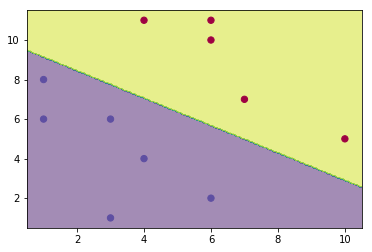

In [12]:
run_part1()

The Neural Network

In this part, we are going to implement and train a Multi-Layer Perceptron i.e. a three-layer deep fully connected neural network and train it on the two-class spiral dataset using the MSE cost function. For this part we generate the data using the twospirals(n points=120, noise=1.6, twist=420) function. After every perceptron/neuron, we will use the hyperbolic tangent (tanh) activation function apart from the output neuron where we will use the sigmoid as the activation function. The network resembles the network in figure 2 in structure but the number of neurons from the first to the last layer should be 20, 15, 1.

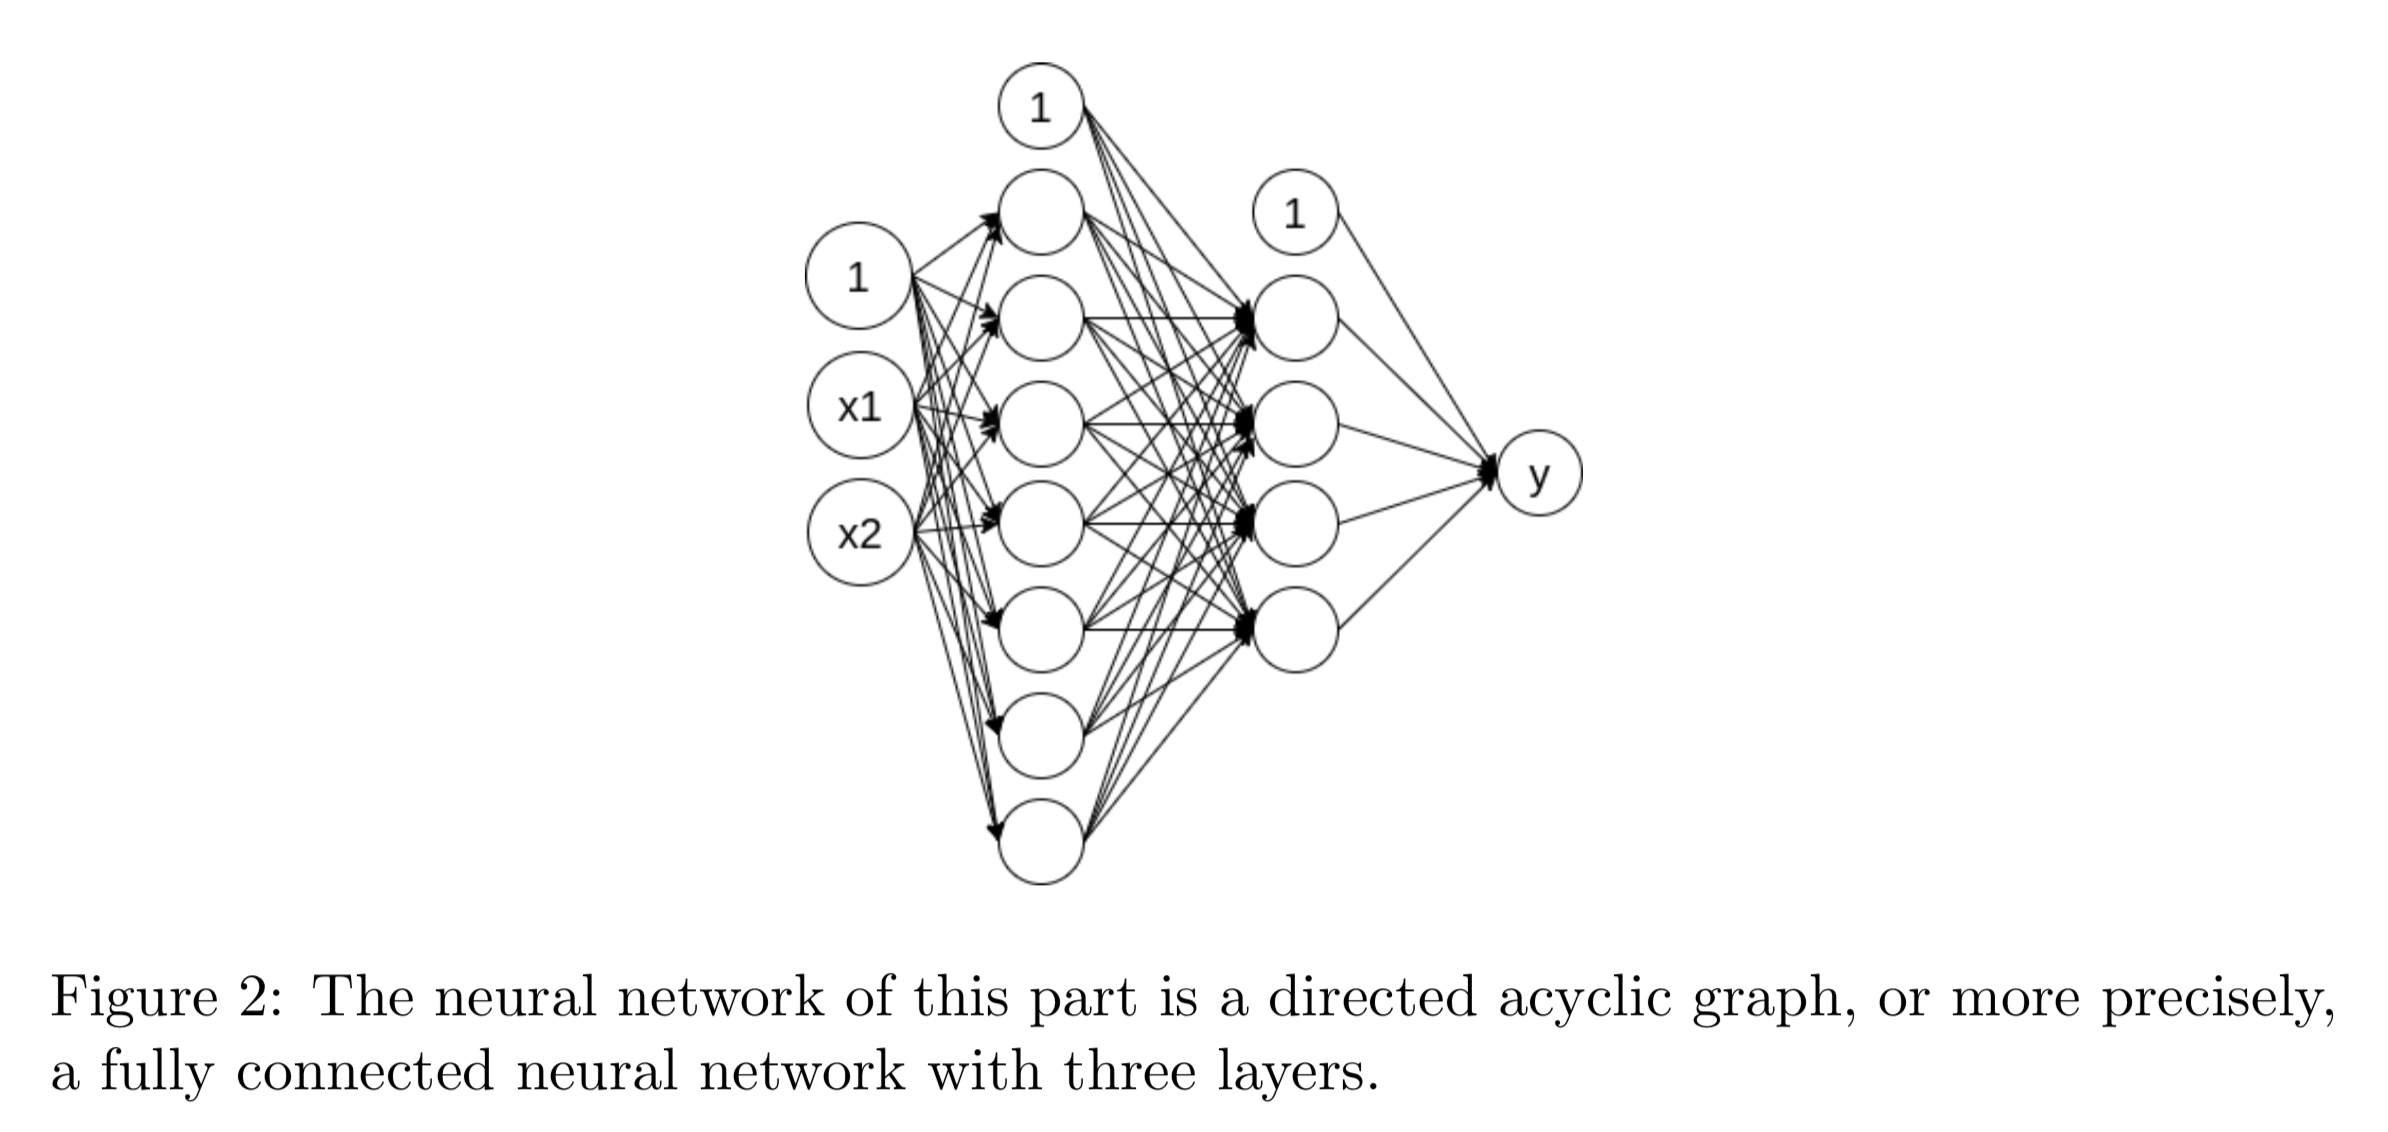

In [13]:
Image('NeuralNetwork.png')

In [14]:
def twospirals(n_points=120, noise=1.6, twist=420):
    """
     Returns a two spirals dataset.
    """
    np.random.seed(0)
    n = np.sqrt(np.random.rand(n_points,1)) * twist * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    X, T =(np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))
    T = np.reshape(T, (T.shape[0],1))
    return X, T

In [15]:
def compute_accuracy(model, X, T):
    """
    Computes the average accuracy over this data.
    """
    return np.mean(((model.forward(X) > 0.5)*1 == T)*1)

In [16]:
def sigmoid(x):
    """
    Implements the sigmoid activation function. 
    """
    ## Implement
    #a = []
    #for item in x:
    #    a.append(1/(1+np.exp(-item)))
    #x=np.array(a)
    x = 1/(1+np.exp(-x))
    ## End
    return x

In [17]:
def dsigmoid(x):
    """
    Implements the derivative of the sigmoid activation function. 
    """
    ## Implement
    #a = []
    #for item in x:
    #    a.append(sigmoid(item)*(1-sigmoid(item)))
    #x=np.array(a)
    x = sigmoid(x)*(1-sigmoid(x))
    ## End
    return x

In [18]:
def tanh(x):
    """
    Implements the hyperbolic tangent activation function.
    """
    ## Implement
    #a = []
    #for item in x:
    #    a.append((np.exp(item)-np.exp(-item))/(np.exp(item)+np.exp(-item)))
    #x=np.array(a)
    x = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    ## End
    return x

In [19]:
def dtanh(x):
    """
    Implements the derivative of the hyperbolic tangent activation function. 
    """
    ## Implement
    #a = []
    #for item in x:
    #    a.append(1-(tanh(item)*tanh(item)))
    #x=np.array(a)
    x = 1-(tanh(x)*tanh(x))
    ## End
    return x 

In [20]:
class NeuralNetwork:
    """
    Keeps track of the variables of the Multi Layer Perceptron model. Can be 
    used for predictoin and to compute the gradients.
    """
    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
        ## Implement
        
        W1_in = 2
        W1_out = 20
        W2_in = 20
        W2_out = 15
        W3_in = 15
        W3_out = 1
        
        self.var = {
            "W1": np.random.randn(W1_in, W1_out) / np.sqrt(W1_in),
            "b1": np.random.randn(1, W1_out),
            "W2": np.random.randn(W2_in, W2_out) / np.sqrt(W2_in),
            "b2": np.random.randn(1, W2_out),
            "W3": np.random.randn(W3_in, W3_out) / np.sqrt(W3_in),
            "b3": np.random.randn(1, W3_out)
        }
        ## End
    
    def forward(self, inputs):
        """
        Implements the forward pass of the MLP model and returns the prediction y. We need to 
        store the current input for the backward function.
        """
        x = self.x = inputs
        
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']
        
        ## Implement
        ## Forward Pass
        ## Layer 1
        a1 = self.a1 = x
        Z1 = self.Z1 = np.dot(a1,W1) + b1
        a2 = self.a2 = tanh(Z1)
        ## Layer 2
        Z2 = self.Z2 = np.dot(a2,W2) + b2
        a3 = self.a3 = tanh(Z2)
        ## Layer 3
        Z3 = self.Z3 = np.dot(a3,W3) + b3
        a4 = self.a4 = y = sigmoid(Z3)
        ## Shape Test
        '''
        print("a1 :", a1.shape)
        print("W1 :", W1.shape)
        print("b1 :", b1.shape)
        print("Z1 :", Z1.shape)
        print("a2 :", a2.shape)
        print("W2 :", W2.shape)
        print("b2 :", b2.shape)
        print("Z2 :", Z2.shape)
        print("a3 :", a3.shape)
        print("W3 :", W3.shape)
        print("b3 :", b3.shape)
        print("Z3 :", Z3.shape)
        print("a4 :", a4.shape)
        '''
        ## End
        return y
    
    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be 
        run before hand for self.x to be defined. Returns the derivatives without applying them using
        a dictonary similar to self.var.  
        """
        x = self.x
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']
        a1 = self.a1
        Z1 = self.Z1
        a2 = self.a2
        Z2 = self.Z2
        a3 = self.a3
        Z3 = self.Z3
        a4 = self.a4
        
        ## Implement
        
        ## Implementation of simple backpropagation to understand what is going on!
        ## Commenting the whole section as this has the scope for generalization
        
        #dW3 = np.dot(a3.T,error*(a4*(1-a4)))
        #dW2 = np.dot(a2.T,np.dot(error*(a4*(1-a4)),W3.T)*(1-a3**2))
        #dW1 = np.dot(a1.T,np.dot(np.dot(error*(a4*(1-a4)),W3.T)*(1-a3**2),W2.T)*(1-a2**2))
        
        ## using Dynamic Programming
        dl3 = error*dsigmoid(Z3)                 #dl3 = (y - T)/n . sigmoid' (Z3)
        dW3 = np.dot(a3.T,dl3)                  #dW3 = a3.T X dl3
        db3 = sum(dl3).reshape(1,-1)
        #print("dW3 :", dW3.shape)
        #print("db3 :", db3.shape)
        
        dl2 = np.dot(dl3,W3.T)*dtanh(Z2)        #dl2 = (dl3 x W3). tanh' (Z2)
        dW2 = np.dot(a2.T,dl2)                  #dW2 = a2.T X dl2
        db2 = sum(dl2).reshape(1,-1)
        #print("dW2 :", dW2.shape)
        #print("db2 :", db2.shape)
        
        dl1 = np.dot(dl2,W2.T)*dtanh(Z1)        #dl1 = (dl2 x W2). tanh' (Z1)
        dW1 = np.dot(a1.T,dl1)                  #dW1 = a1.T X dl1
        db1 = sum(dl1).reshape(1,-1)
        #print("dW1 :", dW1.shape)
        #print("db1 :", db1.shape)
        
        ## End
        updates = {"W1": dW1,
                   "b1": db1,
                   "W2": dW2,
                   "b2": db2,
                   "W3": dW3,
                   "b3": db3
        }
        return updates

In [21]:
def gradient_check():
    """
    Computes the gradient numerically and analitically and compares them.
    """
    X, T = twospirals(n_points=10)
    NN = NeuralNetwork()
    eps = 0.0001
    
    for key,value in NN.var.items():
        row = np.random.randint(0,NN.var[key].shape[0])
        col = np.random.randint(0,NN.var[key].shape[1])
        print("Checking ", key, " at ",row,",",col)
        
        ## Implement
        #analytic_grad = ...
        
        #x1 =  ...
        NN.var[key][row][col] += eps
        #x2 =  ...
        
        ## End
        numeric_grad = (x2 - x1) / eps
        print("numeric grad: ", numeric_grad)
        print("analytic grad: ", analytic_grad)
        if abs(numeric_grad-analytic_grad) < 0.00001:
            print("[OK]")
        else:
            print("[FAIL]")

In [22]:
def run_part2():
    """
    Train the multi layer perceptron according to the assignment.
    """
    ##Implement
    learning_rate = 0.02 #Learning rate for gradient descent
    model = NeuralNetwork()
    X, T = twospirals()
    
    ##Splitting the data set into training and testing sets
    training_ratio = 0.7 #Ratio of split
    training_elements = int(0.7*X.shape[0])
    
    data = np.concatenate((X, T), axis=1)
    np.random.shuffle(data)
    
    training, testing = data[:training_elements], data[training_elements:]
    
    X_training = training[:,(0,1)]
    T_training = training[:,(2)].reshape(-1,1)
    X_testing = testing[:,(0,1)]
    T_testing = testing[:,(2)].reshape(-1,1)
    
    #costs = np.zeros(0)
    for i in range(60000):
        #costs = np.append(costs,train_one_step(model, learning_rate, X_training, T_training))
        train_one_step(model, learning_rate, X_training, T_training)
    
    #plt.plot(costs, label = 'learning rate : %s' % learning_rate)
    plot_boundary(model, X, T, 0.5)
    plt.show()
    #print("MSE : ", train_one_step(model, learning_rate, X_training, T_training))
    #print("Compute Accuracy : ", compute_accuracy(model, X_testing, T_testing))
    ##End

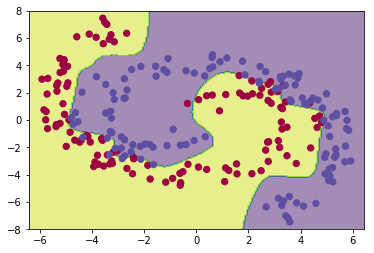

In [23]:
run_part2()
#run_part2(0.2)
#run_part2(0.1)
#run_part2(0.05)
#run_part2(0.02)
#run_part2(0.01)
#plt.legend()
#plt.show()

In [24]:
def relu(x):
    """
    Implements the hyperbolic tangent activation function.
    """
    ## Implement
    x = np.maximum(x,0)
    ## End
    return x

In [25]:
def drelu(x):
    """
    Implements the hyperbolic tangent activation function.
    """
    ## Implement
    x[x<=0] = 0
    x[x>0] = 1
    ## End
    return x

Try using ReLU

In [26]:
# Part 3
class BetterNeuralNetwork:
    """
    Keeps track of the variables of the Multi Layer Perceptron model. Can be 
    used for prediction and to compute the gradients.
    """
    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
        ## Implement
        W1_in = 2
        W1_out = 20
        W2_in = 20
        W2_out = 15
        W3_in = 15
        W3_out = 1
        
        self.var = {
            "W1": np.random.randn(W1_in, W1_out) / np.sqrt(W1_in),
            "b1": np.random.randn(1, W1_out),
            "W2": np.random.randn(W2_in, W2_out) / np.sqrt(W2_in),
            "b2": np.random.randn(1, W2_out),
            "W3": np.random.randn(W3_in, W3_out) / np.sqrt(W3_in),
            "b3": np.random.randn(1, W3_out)
        }
        
        ## End
        
    def forward(self, inputs):
        """
        Implements the forward pass of the MLP model and returns the prediction y. We need to 
        store the current input for the backward function.
        """
        x = self.x = inputs
        
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']
        
        ## Implement
        ## Forward Pass
        ## Layer 1
        a1 = self.a1 = x
        Z1 = self.Z1 = np.dot(a1,W1) + b1
        a2 = self.a2 = relu(Z1)
        ## Layer 2
        Z2 = self.Z2 = np.dot(a2,W2) + b2
        a3 = self.a3 = relu(Z2)
        ## Layer 3
        Z3 = self.Z3 = np.dot(a3,W3) + b3
        a4 = self.a4 = y = sigmoid(Z3)
        ## End
        return y
    
    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be 
        run before hand for self.x to be defined. Returns the derivatives without applying them using 
        a dictonary similar to self.var.  
        """
        x = self.x
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']
        a1 = self.a1
        Z1 = self.Z1
        a2 = self.a2
        Z2 = self.Z2
        a3 = self.a3
        Z3 = self.Z3
        a4 = self.a4
        
        ## Implement
        
        ## Implementation of simple backpropagation to understand what is going on!
        ## Commenting the whole section as this has the scope of generalization
        
        #dW3 = np.dot(a3.T,error*(a4*(1-a4)))
        #dW2 = np.dot(a2.T,np.dot(error*(a4*(1-a4)),W3.T)*(1-a3**2))
        #dW1 = np.dot(a1.T,np.dot(np.dot(error*(a4*(1-a4)),W3.T)*(1-a3**2),W2.T)*(1-a2**2))
        
        ## using Dynamic Programming
        dl3 = error*dsigmoid(Z3)                 #dl3 = (y - T)/n . sigmoid' (Z3)
        dW3 = np.dot(a3.T,dl3)                  #dW3 = a3.T X dl3
        db3 = sum(dl3).reshape(1,-1)
        #print("dW3 :", dW3.shape)
        #print("db3 :", db3.shape)
        
        dl2 = np.dot(dl3,W3.T)*drelu(Z2)        #dl2 = (dl3 x W3). tanh' (Z2)
        dW2 = np.dot(a2.T,dl2)                  #dW2 = a2.T X dl2
        db2 = sum(dl2).reshape(1,-1)
        #print("dW2 :", dW2.shape)
        #print("db2 :", db2.shape)
        
        dl1 = np.dot(dl2,W2.T)*drelu(Z1)        #dl1 = (dl2 x W2). tanh' (Z1)
        dW1 = np.dot(a1.T,dl1)                  #dW1 = a1.T X dl1
        db1 = sum(dl1).reshape(1,-1)
        #print("dW1 :", dW1.shape)
        #print("db1 :", db1.shape)
        
        ## End
        updates = {"W1": dW1,
                   "b1": db1,
                   "W2": dW2,
                   "b2": db2,
                   "W3": dW3,
                   "b3": db3
        }
        return updates

In [27]:
def run_part3():
    """
    Train the multi layer perceptron according to the assignment.
    """
    ##Implement
    learning_rate = 0.02 #Learning rate for gradient descent
    model = BetterNeuralNetwork()
    X, T = twospirals()
    
    ##Splitting the data set into training and testing sets
    training_ratio = 0.7 #Ratio of split
    training_elements = int(0.7*X.shape[0])
    
    data = np.concatenate((X, T), axis=1)
    np.random.shuffle(data)
    
    training, testing = data[:training_elements], data[training_elements:]
    
    X_training = training[:,(0,1)]
    T_training = training[:,(2)].reshape(-1,1)
    X_testing = testing[:,(0,1)]
    T_testing = testing[:,(2)].reshape(-1,1)
    
    #costs = np.zeros(0)
    for i in range(60000):
        #costs = np.append(costs,train_one_step(model, learning_rate, X_training, T_training))
        train_one_step(model, learning_rate, X_training, T_training)
    
    #plt.plot(costs, label = 'learning rate : %s' % learning_rate)
    plot_boundary(model, X, T, 0.5)
    plt.show()
    #print("MSE : ", train_one_step(model, learning_rate, X_training, T_training))
    #print("Compute Accuracy : ", compute_accuracy(model, X_testing, T_testing))
    ##End

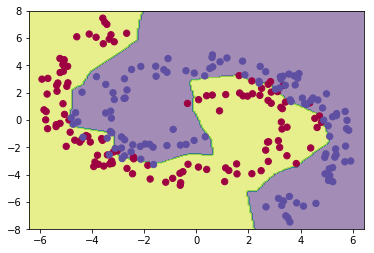

In [28]:
run_part3()
#run_part3(0.2)
#run_part3(0.1)
#run_part3(0.05)
#run_part3(0.02)
#run_part3(0.01)
#plt.legend()
#plt.show()